In [1]:
from sklearn import ensemble, cross_validation, learning_curve, metrics
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupShuffleSplit
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from scipy.stats.kde import gaussian_kde
from scipy.optimize import brentq

import itertools

C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Popova_Va\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are mov

In [2]:
triplexes = pd.read_csv('basetriples_nosam.csv', header=0, sep='\t')

In [6]:
triplexes.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,1b23.cif1_R,110,R.4SU.8.R.G.15.R.PSU.55.,-_-_-,12.32_21.81_22.62,0,0,1,0,0,...,1,0,0,0,1,0,0,7,0,0
1,1b23.cif1_R,110,R.4SU.8.R.G.48.R.PSU.55.,cSS_-_-,4.06_19.17_22.62,1,0,0,0,0,...,1,0,0,0,1,0,0,7,0,0
2,1b23.cif1_R,110,R.4SU.8.R.MIA.37.R.G.48.,-_-_cSS,33.9_36.92_4.06,0,0,1,0,0,...,0,0,0,0,0,0,0,5,0,0
3,1b23.cif1_R,120,R.A.13.R.G.15.R.G.27.,-_-_-,10.88_28.24_19.46,1,0,0,0,0,...,1,0,0,0,1,0,0,9,1,0
4,1b23.cif1_R,120,R.A.9.R.U.25.R.A.46.,-_-_-,12.5_15.93_4.24,0,1,0,0,1,...,0,0,0,0,0,0,0,5,1,0


In [3]:
### !!!!! необходимые данные - train

triplexes_data = triplexes.iloc[:, 5:475]
triplexes_target = triplexes.iloc[:, 476]

In [4]:
triplexes_test = pd.read_csv('basetriples_sam_full.csv', header=0, sep='\t')

In [9]:
triplexes_test.head()

,pdb_chain,type,dssrs,bps,dists,same12,local12,longrange12,same23,local23,...,h3p5,b3p5,i3p5,j3p5,lc3p5,li3p5,lp3p5,fl3p5,fed3p5,istriple
0,2qwy.cif1_C,123,C.C.27.C.G.28.C.C.29.,-_-_-,4.8_5.65_10.0,1,0,0,1,0,...,1,0,0,0,0,0,1,11,3,0
1,2qwy.cif1_C,123,C.G.28.C.C.29.C.A.36.,-_-_-,5.65_5.84_5.42,1,0,0,0,1,...,1,0,0,0,0,0,1,11,0,0
2,2qwy.cif1_C,123,C.G.6.C.G.28.C.C.29.,-_-_-,8.34_5.65_10.44,1,0,0,1,0,...,1,0,0,0,0,0,1,11,3,0
3,2qwy.cif1_C,123,C.U.26.C.G.28.C.C.29.,-_-_-,9.76_5.65_14.44,1,0,0,1,0,...,1,0,0,0,0,0,1,11,3,0
4,2qwy.cif1_C,123,C.G.28.C.C.29.C.U.38.,-_-_-,5.65_12.35_6.96,1,0,0,0,1,...,0,0,0,0,0,0,0,2,0,0


In [5]:
### !!!!! необходимые данные - test

triplexes_test_data = triplexes_test.iloc[:, 5:475]
triplexes_test_target = triplexes_test.iloc[:, 476]

In [6]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap="YlGnBu"):  #"YlGnBu" plt.cm.gray_r
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    print("CONFUSION MATRIX")
    print(df_confusion)
    a = itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1]))
    for i, j in itertools.product(range(df_confusion.shape[0]), range(df_confusion.shape[1])):
        if i == 2:
            i_ = 'All'
        else:
            i_ = i
        if j == 2:
            j_ = 'All'
        else:
            j_ = j
        plt.text(i, j, df_confusion[i_][j_], horizontalalignment="center", color='black')
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    plt.show()
    
    
    
def probability_density(y_prob, y):
    kde1 = gaussian_kde(y_prob[y == 1])
    kde2 = gaussian_kde(y_prob[y == 0])
    
    x1 = np.linspace(np.min(y_prob[y == 1]),np.max(y_prob[y == 1]),500)
    x2 = np.linspace(np.min(y_prob[y == 0]),np.max(y_prob[y == 0]),500)
    
    try:
        treshold = brentq(lambda x : kde1(x) - kde2(x), x2[np.argmax(kde1(x1))], x1[np.argmax(kde2(x2))])
    except ValueError:
        treshold = 0.5
        
    plt.fill_between(x1,kde1(x1),0, color='darkblue', alpha = 0.5, label = 'Triplexes')
    plt.fill_between(x2,kde2(x2), 0, color='darkgrey', alpha = 0.5, label = 'Non-triplexes')
    plt.axvline(x1[np.argmax(kde1(x1))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(x2[np.argmax(kde2(x2))], color='black', linestyle='--', alpha = 0.5)
    plt.axvline(treshold, color='black', linestyle='-.', alpha = 0.7, label = str(round(treshold,2)))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title('Probability Distributions')
    plt.xlabel('Probabilities')
    plt.show()


In [7]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [8]:
rf_classifier.fit(triplexes_data, triplexes_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [9]:
prediction_result = rf_classifier.predict(triplexes_test_data)
predict_proba = rf_classifier.predict_proba(triplexes_test_data)

In [10]:
#PREDICTED PROBABILITIES
for index, row in triplexes_test.iterrows():
    if triplexes_test_target[index] != prediction_result[index]:
        print(row['type'], row['dssrs'], row['bps'], row['dists'], "PROBA: ", predict_proba[index][1])

123 C.G.8.C.U.11.C.U.18. -_-_- 14.13_16.28_19.3 PROBA:  0.5283381823619028
123 C.G.8.C.U.12.C.U.18. -_-_- 18.68_15.2_19.3 PROBA:  0.5314163147280243
123 C.G.22.C.C.23.C.A.24. -_-_- 5.4_4.75_9.68 PROBA:  0.593976719812251
123 C.G.22.C.C.23.C.A.41. -_-_- 5.4_14.34_17.79 PROBA:  0.5143209663439823
123 C.C.23.C.A.24.C.C.43. -_-_- 4.75_6.86_7.32 PROBA:  0.6304012416656245
123 C.C.23.C.U.40.C.C.43. -_-_- 13.71_13.51_7.32 PROBA:  0.5058355730806826
123 C.C.23.C.A.41.C.C.43. -_-_- 14.34_11.38_7.32 PROBA:  0.529118198066076
123 C.U.18.C.G.22.C.G.42. -_-_- 18.9_14.06_24.44 PROBA:  0.5012146367569129
123 C.G.22.C.A.24.C.G.42. -_-_- 9.68_7.2_14.06 PROBA:  0.591757255385932
123 C.A.9.C.U.11.C.U.18. -_-_- 10.44_16.28_17.72 PROBA:  0.5020562950177194
123 C.U.11.C.U.12.C.U.18. -_-_- 5.72_15.2_16.28 PROBA:  0.5343151269660136
123 C.U.11.C.U.18.C.A.24. -_-_- 16.28_25.32_13.57 PROBA:  0.5184177531509038
123 C.U.20.C.U.21.C.A.24. -_-_- 5.92_15.9_20.48 PROBA:  0.6453174020302509
123 C.U.21.C.A.24.C.A.46. -

112 A.A.26.A.A.44.A.G.46. -_-_- 13.73_10.67_12.67 PROBA:  0.664189748272809
112 A.C.27.A.A.43.A.G.46. -_-_cWW 13.81_12.16_10.6 PROBA:  0.6953996117219375
112 A.C.27.A.G.46.A.C.87. cWW_-_- 10.6_15.15_20.84 PROBA:  0.6169614923618143
112 A.C.27.A.G.46.A.A.90. cWW_-_- 10.6_19.4_20.05 PROBA:  0.5755954712730627
112 A.C.27.A.U.29.A.A.43. -_-_- 10.96_12.12_13.81 PROBA:  0.6152034428371472
112 A.U.29.A.A.43.A.G.46. -_-_- 12.12_12.16_6.84 PROBA:  0.6648853193826091
112 A.A.26.A.U.29.A.A.44. -_cWW_- 12.52_10.45_13.73 PROBA:  0.6225531832156771
112 A.U.29.A.A.44.A.C.87. cWW_-_- 10.45_4.53_14.45 PROBA:  0.5065190164917548
112 A.U.29.A.A.44.A.A.90. cWW_-_- 10.45_11.08_16.18 PROBA:  0.5139914792847964
112 A.C.27.A.A.43.A.A.44. -_cSH_- 13.81_6.45_16.72 PROBA:  0.7090395531303195
112 A.A.43.A.A.44.A.G.46. cSH_-_- 6.45_10.67_12.16 PROBA:  0.6415950706794539
112 A.G.30.A.C.42.A.A.43. cWW_-_- 10.82_5.96_10.65 PROBA:  0.6674054227530624
112 A.G.30.A.C.42.A.A.90. cWW_-_- 10.82_3.68_12.34 PROBA:  0.5740373

120 A.A.26.A.U.29.A.G.45. -_-_- 12.52_6.82_14.07 PROBA:  0.662601970898721
120 A.A.26.A.C.28.A.A.44. -_-_- 10.23_14.04_13.73 PROBA:  0.6003894426937733
120 A.A.26.A.A.44.A.G.45. -_-_- 13.73_6.07_14.07 PROBA:  0.5902647093444663
120 A.C.27.A.U.29.A.G.72. -_-_- 10.96_4.89_9.75 PROBA:  0.5236540826969294
120 A.C.27.A.U.29.A.A.39. -_-_- 10.96_17.57_14.07 PROBA:  0.6056712902094649
120 A.C.27.A.U.29.A.A.52. -_-_- 10.96_30.38_21.46 PROBA:  0.6160307077158031
120 A.C.27.A.U.29.A.G.88. -_-_- 10.96_21.16_27.22 PROBA:  0.6111131483750191
120 A.C.27.A.U.29.A.A.86. -_-_- 10.96_8.23_17.56 PROBA:  0.6071707087612552
120 A.C.27.A.U.29.A.C.51. -_-_- 10.96_31.43_23.63 PROBA:  0.7045744043387798
120 A.C.27.A.U.29.A.G.91. -_-_- 10.96_19.41_23.92 PROBA:  0.5673595987756326
120 A.A.25.A.C.27.A.U.29. -_-_- 10.19_10.96_16.64 PROBA:  0.6593138707601826
120 A.C.27.A.U.29.A.U.47. -_-_- 10.96_10.63_8.57 PROBA:  0.6032331396195046
120 A.C.27.A.U.29.A.A.85. -_-_- 10.96_11.37_21.09 PROBA:  0.6171579293683073
120 A.

0 A.C.76.A.G.79.A.G.82. -_-_- 13.68_12.61_7.57 PROBA:  0.5393547734915808
0 A.C.76.A.G.82.A.G.88. -_-_- 7.57_32.97_33.18 PROBA:  0.6047550350405431
0 A.C.76.A.G.82.A.A.86. -_-_- 7.57_19.66_20.05 PROBA:  0.5850493885928247
0 A.C.76.A.G.82.A.G.91. -_-_- 7.57_34.04_37.11 PROBA:  0.5495045416828996
0 A.C.76.A.G.82.A.A.85. -_-_- 7.57_16.29_15.85 PROBA:  0.5709533734190556
0 A.C.76.A.A.80.A.G.82. -_-_- 14.63_10.63_7.57 PROBA:  0.555443059471005
0 A.C.76.A.G.82.A.A.89. -_-_- 7.57_32.22_33.07 PROBA:  0.5966655255096142
0 A.C.75.A.G.79.A.G.82. -_-_cWW 17.56_12.61_10.42 PROBA:  0.5470492653624722
0 A.A.52.A.C.75.A.G.82. -_cWW_- 38.77_10.42_45.64 PROBA:  0.5299883010756035
0 A.C.75.A.G.82.A.G.88. cWW_-_- 10.42_32.97_28.48 PROBA:  0.5350167024330463
0 A.C.75.A.G.82.A.A.86. cWW_-_- 10.42_19.66_15.37 PROBA:  0.5935373484405
0 A.C.51.A.C.75.A.G.82. -_cWW_- 39.27_10.42_46.87 PROBA:  0.5518424799505692
0 A.C.75.A.G.82.A.G.91. cWW_-_- 10.42_34.04_33.32 PROBA:  0.5332669541226284
0 A.C.75.A.A.78.A.G.82. 

0 A.U.47.A.G.64.A.G.66. -_-_- 30.28_10.14_24.03 PROBA:  0.5304321080090947
0 A.G.64.A.G.66.A.A.85. -_-_- 10.14_39.74_45.88 PROBA:  0.5318245870797574
0 A.G.64.A.G.66.A.A.89. -_-_- 10.14_42.24_45.85 PROBA:  0.525360106607876
0 A.C.62.A.G.66.A.A.85. -_-_- 18.05_39.74_46.74 PROBA:  0.5375896919550204
0 A.G.14.A.G.16.A.A.17. -_-_tSH 7.76_5.22_10.29 PROBA:  0.5569011295405667
0 A.G.14.A.A.15.A.A.17. -_-_tSH 7.2_10.3_10.29 PROBA:  0.5473731878532128
0 A.G.13.A.A.17.A.C.20. -_-_- 14.73_16.25_8.19 PROBA:  0.5150106537944016
0 A.G.10.A.A.17.A.C.20. -_-_- 21.19_16.25_13.35 PROBA:  0.5262696688009733
0 A.G.11.A.A.17.A.C.20. -_-_cWW 20.97_16.25_10.8 PROBA:  0.5622417784678134
0 A.G.13.A.A.17.A.C.19. -_-_- 14.73_10.34_8.31 PROBA:  0.5745224308384161
0 A.G.10.A.A.17.A.C.19. -_-_- 21.19_10.34_15.69 PROBA:  0.547348058822944
0 A.G.11.A.A.17.A.C.19. -_-_- 20.97_10.34_14.09 PROBA:  0.5595918413738206
0 A.G.12.A.A.17.A.C.19. -_-_cWW 18.31_10.34_10.86 PROBA:  0.524413949712316
0 A.G.13.A.A.17.A.C.21. -_-_

0 A.C.7.A.G.22.A.U.50. -_cWW_- 21.22_10.41_13.66 PROBA:  0.6745316498040037
0 A.G.22.A.A.39.A.U.50. -_-_cWW 31.4_27.44_10.41 PROBA:  0.694999131837238
0 A.G.22.A.U.50.A.A.52. cWW_-_- 10.41_11.14_21.03 PROBA:  0.6265869099070406
0 A.G.22.A.U.50.A.G.88. cWW_-_- 10.41_27.71_20.63 PROBA:  0.5381912457851373
0 A.G.22.A.U.50.A.A.86. cWW_-_- 10.41_24.23_21.51 PROBA:  0.6338883931078338
0 A.G.22.A.U.50.A.C.51. cWW_-_- 10.41_9.35_17.73 PROBA:  0.6333227312911994
0 A.G.22.A.U.50.A.G.91. cWW_-_- 10.41_31.29_28.81 PROBA:  0.5338214147287896
0 A.G.22.A.A.25.A.U.50. -_-_cWW 14.71_9.93_10.41 PROBA:  0.6498453279708153
0 A.G.22.A.U.47.A.U.50. -_-_cWW 17.93_14.41_10.41 PROBA:  0.6731719003800489
0 A.G.22.A.U.50.A.A.85. cWW_-_- 10.41_27.25_24.1 PROBA:  0.5948697673378478
0 A.G.22.A.U.50.A.A.89. cWW_-_- 10.41_23.38_18.79 PROBA:  0.5669385576950089
0 A.G.13.A.G.14.A.C.20. -_-_- 5.62_11.7_8.19 PROBA:  0.5108040479941268
0 A.G.10.A.G.14.A.C.20. -_-_- 17.44_11.7_13.35 PROBA:  0.5562033223121413
0 A.G.11.A.G.

0 A.C.55.A.G.60.A.G.63. -_-_- 19.13_12.35_13.73 PROBA:  0.5543230792558022
0 A.C.55.A.G.60.A.U.65. -_-_- 19.13_20.72_8.05 PROBA:  0.5572464873187031
0 A.C.55.A.G.60.A.G.64. -_-_cWW 19.13_16.96_10.65 PROBA:  0.5956750289288884
0 A.C.55.A.G.60.A.C.62. -_-_- 19.13_8.15_16.02 PROBA:  0.5457951820390838
0 A.C.55.A.A.61.A.G.63. -_-_- 19.5_9.84_13.73 PROBA:  0.5212886514833751
0 A.C.55.A.A.61.A.U.65. -_-_- 19.5_19.41_8.05 PROBA:  0.5225554254523228
0 A.C.55.A.A.61.A.G.64. -_-_cWW 19.5_15.3_10.65 PROBA:  0.5827935529163937
0 A.C.7.A.C.55.A.G.63. -_-_- 24.27_13.73_22.07 PROBA:  0.552840914782442
0 A.C.7.A.C.55.A.U.65. -_-_- 24.27_8.05_25.52 PROBA:  0.5656943310100225
0 A.C.7.A.C.55.A.G.64. -_cWW_- 24.27_10.65_24.94 PROBA:  0.6068045422975387
0 A.C.53.A.C.55.A.A.86. -_-_- 10.46_42.75_33.07 PROBA:  0.5207364136766484
0 A.A.52.A.C.55.A.G.63. -_-_- 15.4_13.73_22.28 PROBA:  0.5882763517604364
0 A.A.52.A.C.55.A.U.65. -_-_- 15.4_8.05_20.26 PROBA:  0.5825072661441844
0 A.A.52.A.C.55.A.G.64. -_cWW_- 15.

0 A.A.39.A.C.74.A.G.83. -_cWW_- 30.08_10.54_33.14 PROBA:  0.5206754469649563
0 A.A.52.A.C.74.A.G.83. -_cWW_- 33.46_10.54_43.32 PROBA:  0.5598053301686532
0 A.G.73.A.C.74.A.G.88. -_-_- 5.25_25.2_23.71 PROBA:  0.545669478056343
0 A.G.73.A.C.74.A.A.86. -_-_- 5.25_11.44_9.55 PROBA:  0.5581753844314289
0 A.G.73.A.C.74.A.A.85. -_-_- 5.25_8.66_9.34 PROBA:  0.5282325391160871
0 A.G.73.A.C.74.A.A.89. -_-_- 5.25_24.01_21.07 PROBA:  0.5341429554957163
0 A.C.74.A.G.81.A.G.88. -_-_- 16.7_37.18_25.2 PROBA:  0.5690127870110484
0 A.C.74.A.G.83.A.G.88. cWW_-_- 10.54_28.02_25.2 PROBA:  0.6570155487738524
0 A.C.74.A.G.81.A.A.86. -_-_- 16.7_23.14_11.44 PROBA:  0.6154460090386789
0 A.C.74.A.G.83.A.A.86. cWW_-_- 10.54_15.21_11.44 PROBA:  0.7512724896815708
0 A.C.51.A.C.74.A.G.83. -_cWW_- 33.95_10.54_44.03 PROBA:  0.5298939223417566
0 A.C.74.A.G.81.A.G.91. -_-_- 16.7_36.68_29.66 PROBA:  0.5115517265145835
0 A.C.74.A.A.78.A.G.81. -_-_- 20.79_11.14_16.7 PROBA:  0.5435314899304386
0 A.C.74.A.G.81.A.A.85. -_-_- 

0 A.A.52.A.G.88.A.G.91. -_-_- 38.62_15.34_40.17 PROBA:  0.5994711860110435
0 A.U.47.A.A.52.A.G.88. -_-_- 20.87_38.62_24.93 PROBA:  0.6077470999054548
0 A.A.52.A.A.85.A.G.88. -_-_- 36.29_17.53_38.62 PROBA:  0.6978737194370028
0 A.A.52.A.G.88.A.A.89. -_-_- 38.62_7.52_33.66 PROBA:  0.6373378716324838
0 A.C.28.A.G.45.A.A.52. cWW_-_- 10.33_29.48_26.3 PROBA:  0.719304604236184
0 A.C.51.A.A.52.A.A.86. -_-_- 5.23_33.52_33.33 PROBA:  0.6019913305521223
0 A.A.52.A.A.86.A.G.91. -_-_- 33.52_18.62_40.17 PROBA:  0.6758733297421078
0 A.U.47.A.A.52.A.A.86. -_-_- 20.87_33.52_14.09 PROBA:  0.6057651675581855
0 A.A.52.A.A.85.A.A.86. -_-_- 36.29_5.05_33.52 PROBA:  0.631918554983042
0 A.A.52.A.A.86.A.A.89. -_-_- 33.52_13.08_33.66 PROBA:  0.7170434674531582
0 A.C.51.A.A.52.A.G.91. -_-_- 5.23_40.17_39.89 PROBA:  0.590955186466728
0 A.U.47.A.C.51.A.A.52. -_-_- 21.94_5.23_20.87 PROBA:  0.7217844540274507
0 A.C.51.A.A.52.A.A.85. -_-_- 5.23_36.29_36.07 PROBA:  0.6863065734183941
0 A.C.51.A.A.52.A.A.89. -_-_- 5.2

0 A.G.35.A.A.37.A.C.51. -_-_- 10.65_43.1_50.25 PROBA:  0.7022188918200318
0 A.G.36.A.A.37.A.C.51. -_-_- 5.31_43.1_47.02 PROBA:  0.6273829156315334
0 A.G.35.A.G.36.A.C.51. -_-_- 5.72_47.02_50.25 PROBA:  0.6620645065485643
0 A.G.67.A.U.69.A.G.91. -_-_- 11.09_31.51_42.3 PROBA:  0.6041385120969004
0 A.U.47.A.G.67.A.U.69. -_-_- 19.15_11.09_8.91 PROBA:  0.592999447942281
0 A.G.67.A.U.69.A.A.85. -_-_- 11.09_25.07_35.06 PROBA:  0.5816226163773691
0 A.G.67.A.U.69.A.A.89. -_-_- 11.09_26.72_37.55 PROBA:  0.5834428714149523
0 A.U.69.A.C.70.A.G.91. -_-_- 5.46_28.0_31.51 PROBA:  0.5100002553942616
0 A.U.47.A.U.69.A.C.70. -_-_- 8.91_5.46_7.66 PROBA:  0.5918637956687949
0 A.U.69.A.C.70.A.A.85. -_-_- 5.46_21.88_25.07 PROBA:  0.587890225140643
0 A.U.69.A.C.70.A.A.89. -_-_- 5.46_24.42_26.72 PROBA:  0.57313208657427
0 A.U.69.A.C.71.A.G.91. -_-_- 10.03_28.29_31.51 PROBA:  0.5192391740038969
0 A.U.47.A.U.69.A.C.71. -_-_- 8.91_10.03_10.9 PROBA:  0.6163550753804741
0 A.U.69.A.C.71.A.A.85. -_-_- 10.03_21.89_25

100 A.C.7.A.C.24.A.U.50. -_-_- 10.8_6.69_13.66 PROBA:  0.6008014450716912
100 A.C.24.A.A.39.A.U.50. -_-_- 22.48_27.44_6.69 PROBA:  0.6570017347435213
100 A.C.24.A.U.50.A.A.52. -_-_- 6.69_11.14_15.83 PROBA:  0.670777751143831
100 A.C.24.A.U.50.A.G.88. -_-_- 6.69_27.71_23.5 PROBA:  0.5724415332452337
100 A.C.24.A.U.50.A.A.86. -_-_- 6.69_24.23_21.62 PROBA:  0.5710844416207231
100 A.C.24.A.U.50.A.C.51. -_-_- 6.69_9.35_14.66 PROBA:  0.6828932997751684
100 A.C.24.A.U.50.A.G.91. -_-_- 6.69_31.29_25.28 PROBA:  0.5781745942084858
100 A.C.24.A.A.25.A.U.50. -_-_- 5.03_9.93_6.69 PROBA:  0.6622656559822643
100 A.C.24.A.U.47.A.U.50. -_-_- 14.52_14.41_6.69 PROBA:  0.6764607506316966
100 A.C.24.A.U.50.A.A.85. -_-_- 6.69_27.25_25.56 PROBA:  0.5555752057026743
100 A.C.24.A.U.50.A.A.89. -_-_- 6.69_23.38_18.18 PROBA:  0.5456455984758657
100 A.A.6.A.G.22.A.G.48. -_-_- 24.99_16.36_16.29 PROBA:  0.5467122979509392
100 A.A.6.A.G.48.A.U.50. -_-_- 16.29_10.09_16.03 PROBA:  0.6647517981797357
100 A.G.48.A.U.50.A

100 A.C.27.A.G.45.A.G.88. -_-_- 14.28_17.01_27.22 PROBA:  0.5554020888460086
100 A.C.27.A.C.28.A.A.86. -_-_- 6.01_13.1_17.56 PROBA:  0.6024725830579729
100 A.C.27.A.C.28.A.C.51. -_-_- 6.01_28.05_23.63 PROBA:  0.7018174800165948
100 A.C.27.A.C.28.A.G.91. -_-_- 6.01_22.42_23.92 PROBA:  0.5927688647667475
100 A.A.25.A.C.27.A.C.28. -_-_- 10.19_6.01_14.17 PROBA:  0.5980097398498092
100 A.C.27.A.C.28.A.U.47. -_-_- 6.01_8.11_8.57 PROBA:  0.6793363687229914
100 A.C.27.A.C.28.A.A.85. -_-_- 6.01_16.11_21.09 PROBA:  0.5974011613662382
100 A.C.27.A.C.28.A.A.89. -_-_- 6.01_19.67_20.95 PROBA:  0.5648004382579062
100 A.C.27.A.G.45.A.A.86. -_-_- 14.28_4.21_17.56 PROBA:  0.6111779833906695
100 A.C.27.A.G.45.A.C.51. -_-_- 14.28_29.48_23.63 PROBA:  0.7246444432302438
100 A.C.27.A.G.45.A.G.91. -_-_- 14.28_20.41_23.92 PROBA:  0.58181104129649
100 A.A.25.A.C.27.A.G.45. -_-_- 10.19_14.28_16.3 PROBA:  0.6130936711483647
100 A.C.27.A.G.45.A.U.47. -_-_- 14.28_9.93_8.57 PROBA:  0.7362805291631481
100 A.C.27.A.G.

100 A.C.34.A.A.37.A.A.43. -_-_- 15.47_22.05_26.01 PROBA:  0.5841639226377138
100 A.C.34.A.G.35.A.A.43. -_-_- 6.11_25.89_26.01 PROBA:  0.5077475820442097
100 A.C.34.A.G.36.A.A.43. -_-_- 11.34_24.3_26.01 PROBA:  0.547725569988555
100 A.A.43.A.A.54.A.G.64. -_-_- 32.94_13.54_38.49 PROBA:  0.5166354289489713
100 A.A.43.A.U.47.A.A.85. -_-_- 13.43_16.36_16.27 PROBA:  0.5853256987963691
100 A.A.43.A.U.47.A.A.89. -_-_- 13.43_20.48_7.66 PROBA:  0.5865323583590658
100 A.A.43.A.A.85.A.A.89. -_-_- 16.27_17.41_7.66 PROBA:  0.5815207854225148
100 A.A.37.A.C.38.A.A.43. -_-_- 5.52_18.52_22.05 PROBA:  0.5175843796939393
100 A.G.35.A.C.38.A.A.43. -_-_- 15.1_18.52_25.89 PROBA:  0.5495197269580805
100 A.G.36.A.C.38.A.A.43. -_-_- 10.46_18.52_24.3 PROBA:  0.5307616689558372
100 A.G.35.A.A.37.A.A.43. -_-_- 10.65_22.05_25.89 PROBA:  0.6382666214454374
100 A.G.36.A.A.37.A.A.43. -_-_- 5.31_22.05_24.3 PROBA:  0.5605346735244333
100 A.G.35.A.G.36.A.A.43. -_-_- 5.72_24.3_25.89 PROBA:  0.5759935432986516
100 A.C.28.

100 A.U.47.A.A.86.A.C.87. -_-_- 14.09_8.58_18.37 PROBA:  0.6618641317561643
100 A.A.85.A.A.86.A.C.87. -_-_- 5.05_8.58_12.22 PROBA:  0.7075148070901437
100 A.A.86.A.C.87.A.A.89. -_-_- 8.58_5.71_13.08 PROBA:  0.6733535860947442
100 A.C.51.A.C.87.A.G.91. -_-_- 32.75_14.56_39.89 PROBA:  0.6507709078269334
100 A.U.47.A.C.51.A.C.87. -_-_- 21.94_32.75_18.37 PROBA:  0.632003709505045
100 A.C.51.A.A.85.A.C.87. -_-_- 36.07_12.22_32.75 PROBA:  0.6660589919469053
100 A.C.51.A.C.87.A.A.89. -_-_- 32.75_5.71_32.44 PROBA:  0.65975528172637
100 A.G.67.A.U.69.A.C.87. -_-_- 11.09_25.97_36.8 PROBA:  0.5944167185996067
100 A.U.69.A.C.70.A.C.87. -_-_- 5.46_23.55_25.97 PROBA:  0.5692676724280727
100 A.U.69.A.C.71.A.C.87. -_-_- 10.03_25.11_25.97 PROBA:  0.5667510537218865
100 A.G.67.A.C.70.A.C.87. -_-_- 15.42_23.55_36.8 PROBA:  0.655516399058717
100 A.G.67.A.C.71.A.C.87. -_-_- 18.12_25.11_36.8 PROBA:  0.6213665698872727
100 A.G.81.A.G.83.A.C.87. -_-_- 10.59_23.1_31.56 PROBA:  0.5668834521259692
100 A.A.54.A.G

100 A.A.54.A.U.65.A.A.90. cWW_-_- 10.57_44.37_40.96 PROBA:  0.5768243827493953
100 A.C.34.A.C.38.A.A.90. -_-_- 18.79_15.54_18.67 PROBA:  0.5075565914898941
100 A.C.34.A.A.37.A.A.90. -_-_- 15.47_18.12_18.67 PROBA:  0.5915585483736613
100 A.C.34.A.G.36.A.A.90. -_-_- 11.34_19.42_18.67 PROBA:  0.5042807712522204
100 A.A.54.A.G.64.A.A.90. -_-_- 13.54_44.73_40.96 PROBA:  0.5025644409508403
100 A.A.54.A.C.62.A.A.90. -_-_- 17.06_41.05_40.96 PROBA:  0.5070926394112681
100 A.U.47.A.A.85.A.A.90. -_-_- 16.36_19.6_21.74 PROBA:  0.599718617434597
100 A.U.47.A.A.89.A.A.90. -_-_- 20.48_5.58_21.74 PROBA:  0.6091104499924797
100 A.A.85.A.A.89.A.A.90. -_-_- 17.41_5.58_19.6 PROBA:  0.5581403480661146
100 A.G.35.A.A.37.A.A.90. -_-_- 10.65_18.12_19.77 PROBA:  0.6388803033789913
100 A.G.36.A.A.37.A.A.90. -_-_- 5.31_18.12_19.42 PROBA:  0.5184398402771951
100 A.G.35.A.G.36.A.A.90. -_-_- 5.72_19.42_19.77 PROBA:  0.5275468625119386
110 A.G.8.A.G.22.A.C.24. -_-_cSS 16.15_10.83_6.04 PROBA:  0.6297523163243831
110 

112 A.G.32.A.G.35.A.A.62. -_-_- 7.15_19.73_14.39 PROBA:  0.5954637270487403
112 A.G.32.A.G.35.A.U.64. -_-_- 7.15_25.79_20.59 PROBA:  0.6045861752174648
112 A.A.20.A.U.22.A.G.30. -_cWW_- 9.53_10.34_17.14 PROBA:  0.6582028182532582
112 A.U.22.A.G.30.A.G.32. cWW_-_- 10.34_10.64_7.63 PROBA:  0.6133388135215564
112 A.U.22.A.G.30.A.G.35. cWW_-_- 10.34_17.56_12.91 PROBA:  0.60731655644126
112 A.U.22.A.G.30.A.A.62. cWW_-_- 10.34_8.08_13.91 PROBA:  0.572935787663528
112 A.U.22.A.A.24.A.G.30. -_-_cWW 11.66_15.85_10.34 PROBA:  0.6363927825836114
112 A.U.22.A.G.30.A.U.64. cWW_-_- 10.34_14.89_15.52 PROBA:  0.5430814188355154
112 A.U.22.A.G.23.A.A.61. -_-_- 5.91_9.86_12.37 PROBA:  0.6549633723098323
112 A.U.22.A.C.29.A.A.61. -_-_- 14.11_14.19_12.37 PROBA:  0.6466568438870983
112 A.G.23.A.G.30.A.A.61. -_cSW_- 7.69_9.7_9.86 PROBA:  0.6567370444964951
112 A.C.29.A.G.30.A.A.61. -_cSW_- 5.34_9.7_14.19 PROBA:  0.593578054696388
112 A.A.20.A.G.23.A.C.29. -_cWW_- 15.33_10.67_21.13 PROBA:  0.5557287309115848

120 A.G.35.A.C.41.A.A.62. -_-_- 18.24_25.57_19.73 PROBA:  0.5330826473821311
120 A.G.35.A.A.62.A.U.63. -_-_- 19.73_8.78_27.42 PROBA:  0.5443251595190719
120 A.A.34.A.G.35.A.A.62. -_-_- 8.14_19.73_18.8 PROBA:  0.5943173364402202
120 A.G.35.A.A.36.A.A.62. -_-_- 7.51_16.66_19.73 PROBA:  0.5990577569203827
120 A.G.35.A.A.37.A.A.62. -_-_- 11.65_19.0_19.73 PROBA:  0.5244983038518934
120 A.A.33.A.G.35.A.U.64. -_-_- 5.09_25.79_28.4 PROBA:  0.5931871926955445
120 A.G.35.A.C.41.A.U.64. -_-_- 18.24_27.1_25.79 PROBA:  0.5656693050941066
120 A.G.35.A.U.63.A.U.64. -_-_- 27.42_7.08_25.79 PROBA:  0.5628439468243682
120 A.A.34.A.G.35.A.U.64. -_-_- 8.14_25.79_27.79 PROBA:  0.5856884306530875
120 A.G.35.A.A.36.A.U.64. -_-_- 7.51_20.16_25.79 PROBA:  0.6015448649016986
120 A.G.35.A.A.37.A.U.64. -_-_- 11.65_19.39_25.79 PROBA:  0.5504155315660327
120 A.U.22.A.G.23.A.A.33. -_-_- 5.91_18.95_14.66 PROBA:  0.5680364206617157
120 A.U.22.A.G.23.A.U.26. -_-_- 5.91_14.1_16.83 PROBA:  0.6348836608449822
120 A.U.22.A.

0 A.A.6.A.A.10.A.U.88. -_-_cWW 18.43_16.79_10.45 PROBA:  0.5163148675242663
0 A.A.6.A.A.9.A.U.88. -_-_cWW 18.6_17.78_10.45 PROBA:  0.501469981200113
0 A.A.6.A.G.68.A.U.88. -_-_cWW 25.29_22.85_10.45 PROBA:  0.579986493581796
0 A.A.6.A.A.10.A.A.87. -_-_- 18.43_17.79_13.3 PROBA:  0.5020858607249421
0 A.A.6.A.G.68.A.A.87. -_-_- 25.29_17.73_13.3 PROBA:  0.5864683243748405
0 A.A.6.A.U.7.A.G.68. -_-_- 5.29_22.88_25.29 PROBA:  0.5247868898354147
0 A.G.15.A.G.16.A.A.84. -_-_- 5.83_42.21_41.1 PROBA:  0.6410814506620653
0 A.G.15.A.G.17.A.A.84. -_-_- 10.53_40.81_41.1 PROBA:  0.6676062440024941
0 A.G.15.A.C.40.A.A.84. cWW_-_- 10.48_38.31_41.1 PROBA:  0.6909339411328307
0 A.G.15.A.C.39.A.A.84. -_-_- 13.92_35.2_41.1 PROBA:  0.6640771639769157
0 A.G.15.A.C.38.A.A.84. -_-_- 16.82_31.24_41.1 PROBA:  0.6454755006499704
0 A.A.70.A.G.79.A.A.84. -_-_- 15.73_20.59_9.74 PROBA:  0.5839055785775935
0 A.C.72.A.G.79.A.A.84. cWW_-_- 10.66_20.59_18.66 PROBA:  0.6222250771945351
0 A.C.69.A.G.79.A.A.84. -_-_- 17.33_2

0 A.G.71.A.A.76.A.G.79. -_-_- 19.55_12.42_13.86 PROBA:  0.5140670104875045
0 A.G.73.A.A.76.A.G.79. -_-_- 12.81_12.42_7.69 PROBA:  0.5992710123159732
0 A.A.70.A.A.76.A.C.78. -_-_- 20.25_8.19_17.48 PROBA:  0.5509881266056066
0 A.A.70.A.A.76.A.G.82. -_-_- 20.25_23.99_8.06 PROBA:  0.5375280495577011
0 A.A.70.A.A.76.A.U.80. -_-_- 20.25_16.8_12.98 PROBA:  0.5560869424223148
0 A.A.70.A.A.76.A.U.81. -_-_cWW 20.25_20.92_10.52 PROBA:  0.5794196460028241
0 A.G.74.A.A.76.A.A.77. -_-_tSH 7.69_5.11_9.33 PROBA:  0.5095099782326095
0 A.C.72.A.A.76.A.C.78. -_-_- 16.94_8.19_14.21 PROBA:  0.6137144797606962
0 A.G.71.A.A.76.A.C.78. -_-_- 19.55_8.19_16.8 PROBA:  0.547088490613888
0 A.G.73.A.A.76.A.C.78. -_-_cWW 12.81_8.19_10.6 PROBA:  0.6549999640560686
0 A.C.72.A.A.76.A.G.82. -_-_- 16.94_23.99_10.71 PROBA:  0.5282399262292247
0 A.C.72.A.A.76.A.U.80. -_-_- 16.94_16.8_7.87 PROBA:  0.5675212319252282
0 A.C.72.A.A.76.A.U.81. -_-_- 16.94_20.92_7.78 PROBA:  0.5329294091305116
0 A.C.69.A.A.76.A.G.82. -_-_cWW 21.

0 A.C.65.A.C.66.A.U.67. -_-_- 5.48_5.28_9.88 PROBA:  0.6697225276689209
0 A.A.9.A.U.67.A.G.68. -_-_- 17.86_5.88_21.39 PROBA:  0.552849527293007
0 A.A.9.A.U.67.A.A.83. -_-_- 17.86_14.23_17.88 PROBA:  0.548380210188475
0 A.U.67.A.G.68.A.A.83. -_-_- 5.88_11.8_14.23 PROBA:  0.587556498382207
0 A.G.16.A.G.17.A.C.41. -_-_- 5.32_10.39_7.36 PROBA:  0.6586090505292657
0 A.G.16.A.C.40.A.C.41. -_-_- 7.38_5.23_7.36 PROBA:  0.6307109325443548
0 A.G.16.A.C.39.A.C.41. cWW_-_- 10.45_10.07_7.36 PROBA:  0.6241138949896958
0 A.G.16.A.C.38.A.C.41. -_-_- 14.15_14.56_7.36 PROBA:  0.6560227416078301
0 A.G.21.A.C.31.A.C.41. cWW_-_- 10.55_23.45_22.97 PROBA:  0.6352345979159737
0 A.A.34.A.C.41.A.U.63. -_-_- 21.84_29.34_27.31 PROBA:  0.5526759435886577
0 A.A.36.A.C.41.A.U.63. -_-_- 19.5_29.34_23.17 PROBA:  0.5509742323194992
0 A.A.37.A.C.41.A.U.63. -_-_- 18.08_29.34_23.82 PROBA:  0.5598534774442564
0 A.A.34.A.A.36.A.C.41. -_-_- 13.8_19.5_21.84 PROBA:  0.6299423838834088
0 A.A.34.A.A.37.A.C.41. -_-_- 18.67_18.08_

0 A.G.13.A.C.38.A.C.40. -_-_- 16.29_10.86_13.64 PROBA:  0.5477480096714767
0 A.G.13.A.C.38.A.C.39. -_-_- 16.29_5.82_15.41 PROBA:  0.5379529182641255
0 A.G.13.A.C.65.A.C.66. -_-_- 20.65_5.48_26.08 PROBA:  0.525157937510561
0 A.A.9.A.G.13.A.G.68. -_-_- 22.9_34.28_21.39 PROBA:  0.6463424249136642
0 A.A.9.A.G.13.A.A.83. -_-_- 22.9_35.81_17.88 PROBA:  0.6414985324382195
0 A.G.13.A.G.68.A.A.83. -_-_- 34.28_11.8_35.81 PROBA:  0.6168044782632794
0 A.A.49.A.A.52.A.G.55. -_-_- 12.69_12.13_7.59 PROBA:  0.578640347617356
0 A.A.51.A.A.52.A.A.53. -_-_- 4.94_5.23_9.87 PROBA:  0.5169611728111712
0 A.U.7.A.G.68.A.U.88. -_-_- 22.88_22.85_8.26 PROBA:  0.5857444559593508
0 A.U.7.A.G.68.A.A.87. -_-_cWW 22.88_17.73_10.46 PROBA:  0.5587979625380001
0 A.A.34.A.A.36.A.U.63. -_-_- 13.8_23.17_27.31 PROBA:  0.5740588007539515
0 A.A.34.A.A.37.A.U.63. -_-_- 18.67_23.82_27.31 PROBA:  0.5180669941108275
0 A.G.27.A.U.63.A.C.66. -_-_cWW 19.43_9.36_10.61 PROBA:  0.630539498388561
0 A.G.27.A.U.63.A.C.65. -_-_- 19.43_7.95

100 A.G.11.A.C.39.A.C.40. -_-_- 24.23_5.45_23.06 PROBA:  0.5455186519776233
100 A.G.11.A.C.38.A.C.40. -_-_- 24.24_10.86_23.06 PROBA:  0.5167434985530516
100 A.G.11.A.C.38.A.C.39. -_-_- 24.24_5.82_24.23 PROBA:  0.5130681986334854
100 A.A.9.A.G.11.A.G.68. -_-_- 12.19_29.93_21.39 PROBA:  0.6329125267235315
100 A.A.9.A.G.11.A.A.83. -_-_- 12.19_27.41_17.88 PROBA:  0.648853306896384
100 A.G.11.A.G.68.A.A.83. -_-_- 29.93_11.8_27.41 PROBA:  0.600626674605249
100 A.A.33.A.G.42.A.C.44. -_-_- 24.13_10.52_28.41 PROBA:  0.6094967264871977
100 A.G.42.A.C.44.A.A.45. -_-_- 10.52_5.01_14.34 PROBA:  0.6326712140026387
100 A.C.41.A.G.42.A.C.44. -_-_- 5.36_10.52_14.75 PROBA:  0.6253405988123584
100 A.G.42.A.C.44.A.U.63. -_-_- 10.52_18.04_26.22 PROBA:  0.6595110795407613
100 A.A.34.A.G.42.A.C.44. -_-_- 21.08_10.52_24.88 PROBA:  0.6761399358457737
100 A.A.36.A.G.42.A.C.44. -_-_- 20.47_10.52_22.64 PROBA:  0.651792836508333
100 A.G.42.A.C.44.A.U.57. -_-_- 10.52_14.36_17.38 PROBA:  0.6227736184324324
100 A.A.3

100 A.G.28.A.G.32.A.C.66. -_-_- 19.35_20.33_8.03 PROBA:  0.5229297551833909
100 A.G.28.A.G.32.A.C.65. -_-_cWW 19.35_15.85_10.61 PROBA:  0.593809637006089
100 A.G.19.A.G.32.A.A.33. -_-_- 12.07_7.9_10.09 PROBA:  0.7710435636580799
100 A.G.19.A.G.32.A.A.34. -_-_- 12.07_10.38_16.16 PROBA:  0.7620318297147971
100 A.G.19.A.G.32.A.A.36. -_-_tSH 12.07_5.06_8.92 PROBA:  0.8162745926983854
100 A.G.18.A.G.19.A.G.32. -_-_- 5.41_12.07_14.4 PROBA:  0.7022611160471004
100 A.G.19.A.G.32.A.A.37. -_-_- 12.07_10.45_9.72 PROBA:  0.782442331050376
100 A.G.32.A.G.42.A.C.60. -_cWW_- 21.89_10.62_16.91 PROBA:  0.5384294863623996
100 A.G.15.A.G.16.A.G.32. -_-_- 5.83_19.19_18.83 PROBA:  0.6447695680370011
100 A.G.15.A.G.17.A.G.32. -_-_- 10.53_17.7_18.83 PROBA:  0.7102456472194899
100 A.G.15.A.G.32.A.C.40. -_-_cWW 18.83_21.04_10.48 PROBA:  0.6148978216147583
100 A.G.15.A.G.32.A.C.39. -_-_- 18.83_18.5_13.92 PROBA:  0.6641342610659352
100 A.G.15.A.G.32.A.C.38. -_-_- 18.83_14.63_16.82 PROBA:  0.6309405345512956
100 

100 A.G.21.A.G.23.A.U.26. -_-_- 11.34_14.1_20.27 PROBA:  0.6149795933170611
100 A.G.23.A.U.26.A.C.31. -_-_- 14.1_19.45_7.23 PROBA:  0.5981294535232091
100 A.G.21.A.G.23.A.C.41. -_-_- 11.34_24.3_22.97 PROBA:  0.6602193534773025
100 A.G.23.A.C.31.A.C.41. -_-_- 7.23_23.45_24.3 PROBA:  0.6069514114654838
100 A.G.21.A.G.23.A.U.63. -_-_- 11.34_13.48_24.59 PROBA:  0.616346922217461
100 A.G.21.A.G.23.A.A.34. -_-_- 11.34_19.98_16.91 PROBA:  0.6382832415372676
100 A.G.21.A.G.23.A.C.25. -_-_- 11.34_11.73_17.75 PROBA:  0.6512826620240325
100 A.G.21.A.G.23.A.A.36. -_-_- 11.34_10.94_4.16 PROBA:  0.5646120772854561
100 A.G.18.A.G.21.A.G.23. -_-_- 12.57_11.34_20.43 PROBA:  0.5841458342068537
100 A.G.21.A.G.23.A.A.37. -_-_- 11.34_11.75_6.18 PROBA:  0.6220317764466149
100 A.G.23.A.C.31.A.A.34. -_-_- 7.23_13.24_19.98 PROBA:  0.554033764519219
100 A.G.23.A.C.25.A.C.31. -_-_- 11.73_18.28_7.23 PROBA:  0.5939964127196875
100 A.G.23.A.C.31.A.A.36. -_-_- 7.23_8.8_10.94 PROBA:  0.5485750092680491
100 A.G.18.A.G

100 A.C.69.A.U.80.A.A.85. -_-_- 15.42_20.24_10.24 PROBA:  0.5786635203896774
100 A.C.69.A.U.81.A.A.85. -_-_- 13.58_17.85_10.24 PROBA:  0.6416980398019418
100 A.A.10.A.G.13.A.A.85. -_-_- 18.47_30.75_23.83 PROBA:  0.6458254781423051
100 A.A.9.A.G.13.A.A.85. -_-_- 22.9_30.75_19.44 PROBA:  0.6531428884430315
100 A.G.13.A.G.68.A.A.85. -_-_- 34.28_9.07_30.75 PROBA:  0.6414587719688543
100 A.G.13.A.A.83.A.A.85. -_-_- 35.81_9.75_30.75 PROBA:  0.667711956110398
100 A.A.9.A.A.10.A.A.85. -_-_- 7.47_23.83_19.44 PROBA:  0.6834104845246083
100 A.A.10.A.G.68.A.A.85. -_-_- 27.44_9.07_23.83 PROBA:  0.6008718936155862
100 A.A.10.A.A.83.A.A.85. -_-_- 23.69_9.75_23.83 PROBA:  0.5881168435611309
100 A.G.71.A.G.82.A.A.85. -_-_- 7.68_14.22_18.88 PROBA:  0.5720789927370692
100 A.G.73.A.G.82.A.A.85. -_-_- 15.32_14.22_25.87 PROBA:  0.5310957320291281
100 A.G.71.A.U.80.A.A.85. cWW_-_- 10.43_20.24_18.88 PROBA:  0.586092641099539
100 A.G.73.A.U.80.A.A.85. -_-_- 8.0_20.24_25.87 PROBA:  0.523064404453174
100 A.G.71.


CONFUSION MATRIX By chain:  5fjc.cif1_A
[[93574  1703]
 [    3     4]]

CONFUSION MATRIX By chain:  4oqu.cif1_A
[[103920   2069]
 [     0      6]]

CONFUSION MATRIX By chain:  2qwy.cif1_C
[[11377    97]
 [    5     1]]

AUC_TRAIN =  0.9948190933378351

AUC =  0.9192090171843069


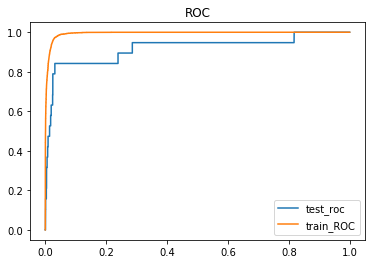

Probability density for train


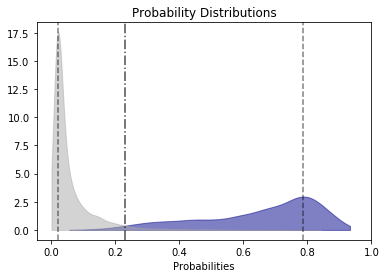

Probability density for test


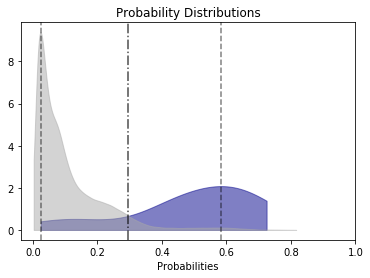


[[208871   3869]
 [     8     11]]
CONFUSION MATRIX
Predicted       0     1     All
Actual                         
0          208871  3869  212740
1               8    11      19
All        208879  3880  212759


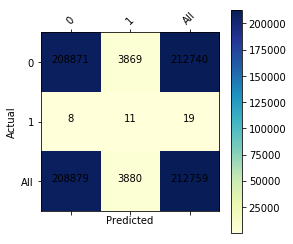


REPORT
             precision    recall  f1-score   support

          0       1.00      0.98      0.99    212740
          1       0.00      0.58      0.01        19

avg / total       1.00      0.98      0.99    212759

ACCURACY =  0.9817775041243849
-----------------


In [11]:
#prediction by chains
chains = list(set(triplexes_test.pdb_chain.values))

print("")
for chain in chains:
    middle_check_test = triplexes_test.loc[triplexes_test['pdb_chain'] == chain]
    middle_target_test = middle_check_test['istriple']
    middle_check_test_ = middle_check_test.iloc[:, 5:475]
    
    prediction_result_by_chain = rf_classifier.predict(middle_check_test_)
    predict_proba_by_chain = rf_classifier.predict_proba(middle_check_test_)


    print("CONFUSION MATRIX By chain: ", chain)
    print(confusion_matrix(middle_target_test, prediction_result_by_chain))
    print("")


#TRY TO PREDICT TRAIN
prediction_train = rf_classifier.predict(triplexes_data)
prediction_prob_train = rf_classifier.predict_proba(triplexes_data)
fpr_train, tpr_train, _ = metrics.roc_curve(triplexes_target,  prediction_prob_train[:, 1])
auc_train = metrics.roc_auc_score(triplexes_target, prediction_prob_train[:, 1])
print("AUC_TRAIN = ", auc_train)
    
#---------------------------------
print("")
fpr, tpr, _ = metrics.roc_curve(triplexes_test_target,  predict_proba[:, 1])
auc = metrics.roc_auc_score(triplexes_test_target, predict_proba[:, 1])
print("AUC = ", auc)
line_test, = plt.plot(fpr, tpr, label='test_roc')
line_train, = plt.plot(fpr_train, tpr_train, label='train_roc')
plt.legend( [line_test, line_train], ['test_roc', 'train_ROC'], loc = 4)
plt.title("ROC")
plt.show()
    
print("Probability density for train")
probability_density(prediction_prob_train[:, 1], triplexes_target)
print("Probability density for test")
probability_density(predict_proba[:, 1], triplexes_test_target)
    
print("")
print(confusion_matrix(triplexes_test_target, prediction_result))
plot_confusion_matrix(pd.crosstab(triplexes_test_target, prediction_result, rownames=['Actual'], colnames=['Predicted'], margins=True))


print("")
print("REPORT")
print(classification_report(triplexes_test_target, prediction_result))
print("ACCURACY = ", accuracy_score(triplexes_test_target, prediction_result))
print("-----------------")
